# Data Visualization Lessons

## Pandas Visualization and Grid Charts

In my first time lesson on data visualization using grid chart, we used a dataset about urban traffic in Sao Paulo, with the goal of determining the factors that cause traffic slowness in Sao Paulo to worsen.

###  how traffic slowness changes over the 7:00 – 20:00 time interval.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

traffic = pd.read_csv('traffic_sao_paulo.csv', sep=';')
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].str.replace(',', '.')
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].astype(float)

In [2]:
# First, we're going to isolate the data for each day — from Monday to Friday.
# We use the zip() function above to iterate over range() and days at the same time.
# The zip() function is used to combine two or more iterables (e.g., lists, tuples) element-wise, 
# creating a new iterable with pairs of corresponding elements from the input iterables.

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
traffic_per_day = {}
for i, day in zip(range(0, 135, 27), days):
    each_day_traffic = traffic[i:i+27]
    traffic_per_day[day] = each_day_traffic
    # traffic_per_day will contain the traffic data for each day of the week in separate entries.

<AxesSubplot:>

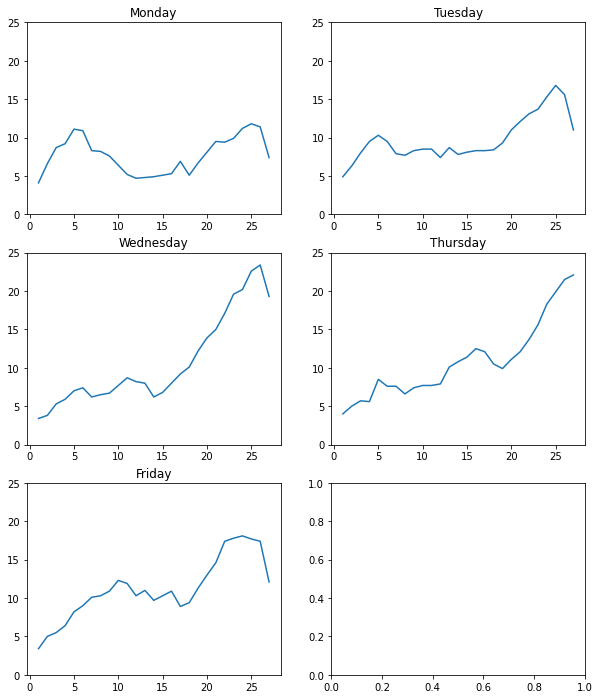

In [3]:
# To create a grid chart, we start by creating the larger figure where we will plot all the graphs
plt.figure(figsize=(10,12))

for i, day in zip(range(1,6), days):
    plt.subplot(3, 2, i)
    plt.plot(traffic_per_day[day]['Hour (Coded)'],
        traffic_per_day[day]['Slowness in traffic (%)'])
    plt.title(day)
    plt.ylim([0,25])
    
plt.subplot(3, 2, 6)

# a grid chart has rows and columns.The grid chart below, for instance, has three rows and two columns. 
# Also, each plot is indexed by a number — the upper left plot has the index 1, its neighboring plot on 
# the right is indexed with 2, and so on.

# The plots are overlapping, and the grid chart as a whole looks a bit too packed. 
# To fix this, we're going to increase the size of the entire figure by using plt.figure(figsize=(width, height)).

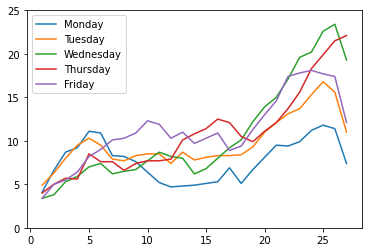

In [4]:
for day in days:
    plt.plot(traffic_per_day[day]['Hour (Coded)'],
             traffic_per_day[day]['Slowness in traffic (%)'],
             label=day)
    plt.ylim([0, 25])

plt.legend()
plt.show()

## Relational plots and multiple variables

**Seaborn enables us to easily show more than two variables on a graph.**

Throughout the lesson, we'll use a dataset about house characteristics and sale prices. The houses were sold between 2006 and 2010 in Ames, Iowa.

Notice that each dot (also called a marker) on the scatter plot is blue. We can change the color intensity of the dots to represent a new variable.

Below, we use the hue parameter to add the Overall Qual variable on the scatter plot. Recall that Overall Qual describes the quality ratings of the overall material and finish of the house.

The values in the Overall Qual variable range from one to ten — one is equivalent to "very poor," and ten is equivalent to "very excellent" (per the documentation).

Seaborn matched lower ratings with lighter colors and higher ratings with darker colors. A pale pink represents a rating of one, while black represents a ten. Seaborn also generated a legend to describe which color describes which rating.

Let's say we want the colors to vary between red and green — where dark red means a rating of one and dark green means a rating of ten. We can make this change using the palette parameter with the 'RdYlGn' argument.

Another element we can use to represent values is size. A dot can have a color and x- and y-coordinates, but it can also be larger or smaller. Below, we use a size representation to add the Garage Area variable on the graph — we use the size parameter. Recall that Garage Area describes the garage area in square feet. To make the size differences more visible, we'll increase the size range — the sizes parameter takes in a tuple specifying the minimum and maximum size. If we don't want to control the size, then Seaborn does the size mapping automatically anyway. Let's practice.

More generally, we call the dots on our graphs markers. The marker can take various shapes: circle, triangle, square, etc.
Below, we add the Rooms variable by changing the shape of the markers. A circle now means a house with seven rooms or more, and an "x" sign represents a house with six rooms or less. To make this change, we use the style parameter.

We'll add one more variable by spatially separating the graph based on the values in the Year variable. This variable describes the year when a house was built, and it has only two values: 1999 or older and 2000 or newer. For each value, we'll build a separate graph that will display the five variables we've already plotted. Below, we add the Year column using the col parameter

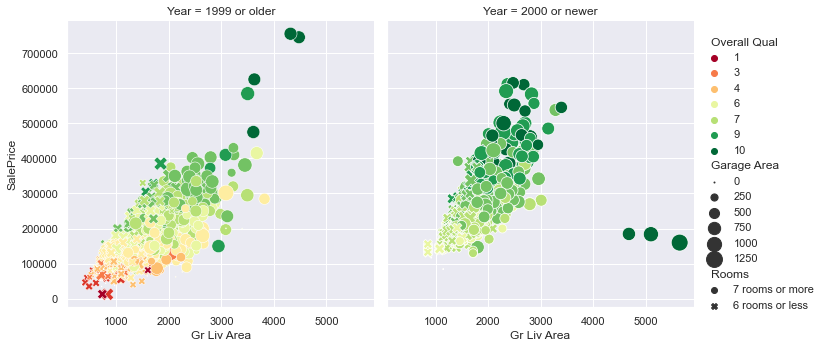

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

housing = pd.read_csv('housing.csv')

# Visually, the graph uses Matplotlib defaults. To switch to Seaborn defaults, we need to call the sns.set_theme() function
# Once we call sns.set_theme(), all subsequent graphs will inherit the Seaborn style — we only need to call this function once.
sns.set_theme()
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
             size='Garage Area', sizes=(1,300),
             style='Rooms', col='Year')
plt.show()